# **MÓDULO 14 - Exercício**
# Pré Processamento dos Dados - A primeira etapa Pré Modelagem

Para nossa atividade usaremos uma base de churn também, porém essa base não diz respeito a serviços bancários e sim serviços de internet, telefone e tv - Telecomunicação.

Vamos realizar aqui as etapas de limpeza e tratamento de dados vistos durante a aula, porém aplicados a essa base nova.

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
#Lembrem-se sempre de alterar a importação dos dados de acordo com o diretório de vocês.
df = pd.read_csv("CHURN_TELECON_MOD08_TAREFA.csv", delimiter=';')

df.head(10)

,customerID,Genero,Idoso,Casado,Dependents,Tempo_como_Cliente,PhoneService,Servico_Internet,Servico_Seguranca,Suporte_Tecnico,StreamingTV,Tipo_Contrato,PaymentMethod,Pagamento_Mensal,Total_Pago,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,DSL,No,No,No,Month-to-month,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,DSL,Yes,No,No,One year,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,DSL,Yes,No,No,Month-to-month,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,DSL,Yes,Yes,No,One year,Bank transfer (automatic),NaN,1840.75,No
4,9237-HQITU,NaN,0,No,No,2,Yes,Fiber optic,No,No,No,Month-to-month,Electronic check,NaN,151.65,Yes
5,9305-CDSKC,NaN,0,No,No,8,Yes,Fiber optic,No,No,Yes,Month-to-month,Electronic check,NaN,820.50,NaN
6,1452-KIOVK,NaN,0,No,Yes,22,Yes,Fiber optic,No,No,Yes,Month-to-month,Credit card (automatic),NaN,1949.40,NaN
7,6713-OKOMC,NaN,0,No,No,10,No,DSL,Yes,No,No,Month-to-month,Mailed check,NaN,301.90,NaN
8,7892-POOKP,NaN,0,Yes,No,28,Yes,Fiber optic,No,Yes,Yes,Month-to-month,Electronic check,NaN,3046.05,NaN
9,6388-TABGU,NaN,0,No,Yes,62,Yes,dsl,Yes,No,No,One year,Bank transfer (automatic),NaN,3487.95,NaN


Legenda dos dados:

*   **CustomerID** : Esse é o ID único de cada cliente nosso da rede de produtos de telecomunicação.

*   **Genero** : O genero dos nossos clientes.

*   **Idoso** : Se nosso cliente tem acima de 60 anos ou não. (Sim = 1 | Não = 0)

*   **Casado** : Se nosso cliente é casado ou não.

*   **Dependents** : Se cliente tem dependentes.

*   **Tempo_como_Cliente** : Tempo em meses que nosso cliente está com a nossa empresa.

*   **PhoneService** : Se ele contratou serviço telefônico com a nossa empresa.

*   **Servico_Internet** : Qual o tipo de serviço de internet contratado.

*   **Servico_Seguranca** : Se ele contratou serviço de segurança com a nossa empresa.

*   **Suporte_Tecnico** : Se já acionou o suporte técnico.

*   **StreamingTV** : Se ele contratou serviço de streaming para TV.

*   **Tipo_Contrato** : Qual o tipo de contrato dos nossos clientes, se era mensal, anual etc.

*   **Tipo_Contrato** : Qual o tipo de contrato dos nossos clientes, se era mensal, anual etc.

*   **PaymentMethod** : Forma de Pagamento.

*   **Pagamento_Mensal** : Quanto o cliente pagava mensalmente.

*   **Total_Pago** : Total já pago pelo cliente para nossa companhia.

*   **Churn** : Nossa coluna mais importante, se nosso cliente nos abandonou ou não.




# 1 - Carregue a base, verifique se os tipos de dados estão de acordo com cada coluna e caso não estejam realize a transformação dos tipos de dados.

In [3]:
df.head()

,customerID,Genero,Idoso,Casado,Dependents,Tempo_como_Cliente,PhoneService,Servico_Internet,Servico_Seguranca,Suporte_Tecnico,StreamingTV,Tipo_Contrato,PaymentMethod,Pagamento_Mensal,Total_Pago,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,DSL,No,No,No,Month-to-month,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,DSL,Yes,No,No,One year,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,DSL,Yes,No,No,Month-to-month,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,DSL,Yes,Yes,No,One year,Bank transfer (automatic),NaN,1840.75,No
4,9237-HQITU,NaN,0,No,No,2,Yes,Fiber optic,No,No,No,Month-to-month,Electronic check,NaN,151.65,Yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   customerID          2500 non-null   object 
 1   Genero              2488 non-null   object 
 2   Idoso               2500 non-null   int64  
 3   Casado              2500 non-null   object 
 4   Dependents          2500 non-null   object 
 5   Tempo_como_Cliente  2500 non-null   int64  
 6   PhoneService        1018 non-null   object 
 7   Servico_Internet    2500 non-null   object 
 8   Servico_Seguranca   2500 non-null   object 
 9   Suporte_Tecnico     2500 non-null   object 
 10  StreamingTV         2500 non-null   object 
 11  Tipo_Contrato       2500 non-null   object 
 12  PaymentMethod       2500 non-null   object 
 13  Pagamento_Mensal    2175 non-null   float64
 14  Total_Pago          2500 non-null   float64
 15  Churn               2495 non-null   object 
dtypes: flo

In [5]:
# Printando todos os uniques das colunas 
for col in df.columns:
    print(f"{col}: {df[col].unique()}\n\n")

customerID: ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '5702-SKUOB' '1134-YWTYF'
 '6061-GWWAV']


Genero: ['Female' 'Male' nan 'F' 'M' 'f']


Idoso: [0 1]


Casado: ['Yes' 'No']


Dependents: ['No' 'Yes']


Tempo_como_Cliente: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]


PhoneService: ['No' 'Yes' nan]


Servico_Internet: ['DSL' 'Fiber optic' 'dsl' 'No']


Servico_Seguranca: ['No' 'Yes' 'No internet service']


Suporte_Tecnico: ['No' 'Yes' 'No internet service']


StreamingTV: ['No' 'Yes' 'No internet service']


Tipo_Contrato: ['Month-to-month' 'One year' 'Two year']


PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


Pagamento_Mensal: [ 29.85  56.95  53.85 ...  98.4  100.7   60.45]


Total_Pago: [  29.85 1889.5   108.15 ...   93.45 1389.85 2894.55]


In [6]:
# Transformando colunas categóricas
colunas_categoricas = ['Servico_Internet', 'Tipo_Contrato', 'PaymentMethod','Servico_Seguranca','Suporte_Tecnico','StreamingTV']

df[colunas_categoricas] = df[colunas_categoricas].astype('category')

In [7]:
# Transformando os valores das colunas Yes/No para 0 e 1
colunas_yes_no = ['Casado','Dependents','PhoneService', 'Churn']
df[colunas_yes_no] = df[colunas_yes_no].apply(lambda x: x.map({'Yes': 1, 'No': 0}))

# Transformando colunas numericas inteiras
colunas_int = ['Casado','Dependents','PhoneService', 'Churn','Idoso','Tempo_como_Cliente']
df[colunas_int] = df[colunas_int].astype('Int64')

# Transformando colunas numericas float
df[['Pagamento_Mensal', 'Total_Pago']] = df[['Pagamento_Mensal', 'Total_Pago']].astype('float64')


In [8]:
# Verificando os tipos de dados
print(df.dtypes)

customerID              object
Genero                  object
Idoso                    Int64
Casado                   Int64
Dependents               Int64
Tempo_como_Cliente       Int64
PhoneService             Int64
Servico_Internet      category
Servico_Seguranca     category
Suporte_Tecnico       category
StreamingTV           category
Tipo_Contrato         category
PaymentMethod         category
Pagamento_Mensal       float64
Total_Pago             float64
Churn                    Int64
dtype: object


In [9]:
df.head()

,customerID,Genero,Idoso,Casado,Dependents,Tempo_como_Cliente,PhoneService,Servico_Internet,Servico_Seguranca,Suporte_Tecnico,StreamingTV,Tipo_Contrato,PaymentMethod,Pagamento_Mensal,Total_Pago,Churn
0,7590-VHVEG,Female,0,1,0,1,0,DSL,No,No,No,Month-to-month,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,0,0,34,1,DSL,Yes,No,No,One year,Mailed check,56.95,1889.50,0
2,3668-QPYBK,Male,0,0,0,2,1,DSL,Yes,No,No,Month-to-month,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,0,0,45,0,DSL,Yes,Yes,No,One year,Bank transfer (automatic),NaN,1840.75,0
4,9237-HQITU,NaN,0,0,0,2,1,Fiber optic,No,No,No,Month-to-month,Electronic check,NaN,151.65,1


# 2 - Esse exercício faremos por etapas:
A) Verifique se temos colunas com dados faltantes e traga a % dos dados faltantes por coluna.

In [10]:
(df.isna().sum() / len(df)) * 100

customerID             0.00
Genero                 0.48
Idoso                  0.00
Casado                 0.00
Dependents             0.00
Tempo_como_Cliente     0.00
PhoneService          59.28
Servico_Internet       0.00
Servico_Seguranca      0.00
Suporte_Tecnico        0.00
StreamingTV            0.00
Tipo_Contrato          0.00
PaymentMethod          0.00
Pagamento_Mensal      13.00
Total_Pago             0.00
Churn                  0.20
dtype: float64

B) Exclua nessa etapa as linhas das colunas com dados faltantes que você analisar que esse método é o ideal. Justifique o motivo de estar excluindo essas linhas.

In [11]:
# Verificando os ausentes na coluna Churn
df[df['Churn'].isna()]

,customerID,Genero,Idoso,Casado,Dependents,Tempo_como_Cliente,PhoneService,Servico_Internet,Servico_Seguranca,Suporte_Tecnico,StreamingTV,Tipo_Contrato,PaymentMethod,Pagamento_Mensal,Total_Pago,Churn
5,9305-CDSKC,NaN,0,0,0,8,1,Fiber optic,No,No,Yes,Month-to-month,Electronic check,NaN,820.50,<NA>
6,1452-KIOVK,NaN,0,0,1,22,1,Fiber optic,No,No,Yes,Month-to-month,Credit card (automatic),NaN,1949.40,<NA>
7,6713-OKOMC,NaN,0,0,0,10,0,DSL,Yes,No,No,Month-to-month,Mailed check,NaN,301.90,<NA>
8,7892-POOKP,NaN,0,1,0,28,1,Fiber optic,No,Yes,Yes,Month-to-month,Electronic check,NaN,3046.05,<NA>
9,6388-TABGU,NaN,0,0,1,62,1,dsl,Yes,No,No,One year,Bank transfer (automatic),NaN,3487.95,<NA>


In [12]:
df = df.dropna(subset=['Churn'])
print(df['Churn'].isna().sum())

0


In [13]:
df[df['Genero'].isna()]

,customerID,Genero,Idoso,Casado,Dependents,Tempo_como_Cliente,PhoneService,Servico_Internet,Servico_Seguranca,Suporte_Tecnico,StreamingTV,Tipo_Contrato,PaymentMethod,Pagamento_Mensal,Total_Pago,Churn
4,9237-HQITU,NaN,0,0,0,2,1,Fiber optic,No,No,No,Month-to-month,Electronic check,NaN,151.65,1
10,9763-GRSKD,NaN,0,1,1,13,1,dsl,Yes,No,No,Month-to-month,Mailed check,NaN,587.45,0
11,7469-LKBCI,NaN,0,0,0,16,1,No,No internet service,No internet service,No internet service,Two year,Credit card (automatic),NaN,326.80,0
12,8091-TTVAX,NaN,0,1,0,58,1,Fiber optic,No,No,Yes,One year,Credit card (automatic),NaN,5681.10,0
13,0280-XJGEX,NaN,0,0,0,49,1,Fiber optic,No,No,Yes,Month-to-month,Bank transfer (automatic),NaN,5036.30,1
14,5129-JLPIS,NaN,0,0,0,25,1,Fiber optic,Yes,Yes,Yes,Month-to-month,Electronic check,NaN,2686.05,0
15,3655-SNQYZ,NaN,0,1,1,69,1,Fiber optic,Yes,Yes,Yes,Two year,Credit card (automatic),NaN,7895.15,0


In [14]:
df = df.dropna(subset=['Genero'])
print(df['Genero'].isna().sum())

0


### Justificativa

 * Os dados ausentes em churn representam apenas 0.20% dos dados totais e os nulos na coluna Genero representam 0.48%. Dada a pequena representatividade dos nulos no volume total da base, é melhor apenas excluir as linhas no caso da coluna 'Churn' e 'Genero'

C) Nessa etapa substitua pela média, mediana ou moda as linhas das colunas com valores faltantes que você analisou e entendeu que esse era o melhor método. Não se esqueça de justificar sua escolha.

**Dica variáveis numéricas:** Não se esqueça de verificar a distrbuição dos dados, média e mediana.

**Dica variáveis categóricas:** Caso precise substituir uma variável categórica utilize um gráfico de barras para verificar a que mais aparece e utilizar ela na substituição.
Ou você pode optar por excluir a coluna, mas justifique sua escolha.

Caso opte por substituir você pode utilizar a função fillna:
df['SUACOLUNA'].fillna("VALOR QUE SUBSTITUIRA O NULO", inplace=True)
Ela funcionará como a replace.

### Justificativa para a coluna "PhoneService":

#### Os dados nulos representavam quase 60% da coluna, então imaginei que, se eu os substituísse pelo valor mais frequente, poderia acabar distorcendo a proporção dos dados e enviesando o DataFrame. Foi então que me lembrei da aula sobre amostragens e usei a ideia da amostragem estratificada como inspiração. Decidi, portanto, pesquisar por um método de substituição que mantivesse a proporção dos dados e não gerasse vieses.

<IntegerArray>
[0, 1, <NA>]
Length: 3, dtype: Int64


<Axes: xlabel='PhoneService', ylabel='count'>

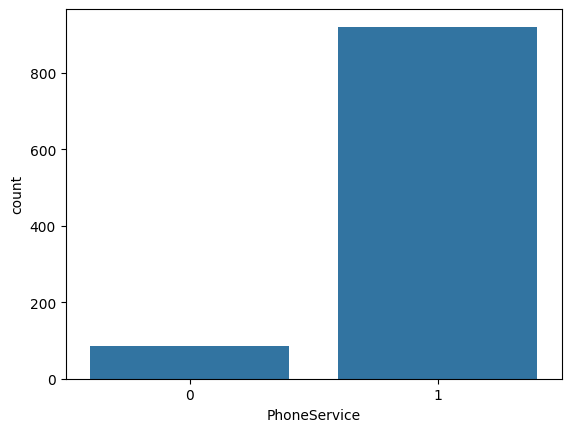

In [15]:
# Verificando a coluna PhoneService
print(df['PhoneService'].unique())
sns.barplot(df['PhoneService'].value_counts())

In [16]:
proporcoes = df['PhoneService'].value_counts(normalize=True)
print(proporcoes.round(2) * 100)

df['PhoneService'] = df['PhoneService'].apply(lambda x: np.random.choice([1, 0], p=proporcoes.values) if pd.isna(x) else x)
df['PhoneService'] = df['PhoneService'].apply(lambda x: 1 if x == '1' else 0 if x == '0' else x)

df['PhoneService'] = df['PhoneService'].astype('Int64')

print('\nProporções após substituição:\n\n',df['PhoneService'].value_counts(normalize=True).round(2) * 100)

PhoneService
1    91.0
0     9.0
Name: proportion, dtype: Float64

Proporções após substituição:

 PhoneService
1    92.0
0     8.0
Name: proportion, dtype: Float64


### Justificativa para a coluna "Pagamento_Mensal":

#### Como essa coluna se trata de valores numéricos do tipo float, eu precisava encontrar o melhor método de substituição. Comecei observando a média, mediana e desvio padrão para verificar se havia alguma disparidade muito grande. Após essa verificação, o próximo passo foi checar a presença de outliers por meio do boxplot e a distribuição dos dados com o histplot. Os gráficos mostraram a inexistência de outliers e indicaram que a distribuição dos dados é assimétrica. Dado esse último fator, optei pela substituição dos valores nulos usando a mediana em vez da média ou da moda, já que, após pesquisa, vi que a mediana é recomendada em casos de distribuição assimétrica, pois representa melhor o centro da distribuição.


In [17]:
# Checando a coluna Pagamento_Mensal
print(df['Pagamento_Mensal'].describe(), '\n')

print('Mediana\n', df['Pagamento_Mensal'].median())

count    2175.000000
mean       65.607563
std        29.931520
min        18.400000
25%        39.500000
50%        71.450000
75%        90.250000
max       118.650000
Name: Pagamento_Mensal, dtype: float64 

Mediana
 71.45


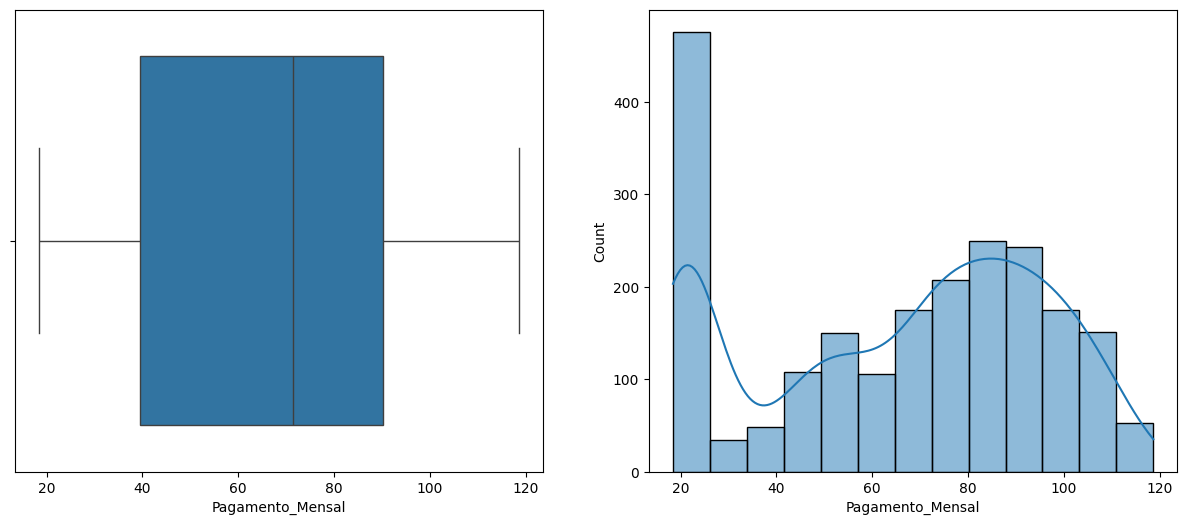

In [18]:
#checando a presença de outliers e a distribuição da coluna Pagamento_Mensal
fig, ax = plt.subplots(1,2, figsize=(15, 6))
sns.boxplot(x=df['Pagamento_Mensal'], ax=ax[0])
sns.histplot(df['Pagamento_Mensal'], kde=True, ax=ax[1])
plt.show()

In [19]:
# Substituindo os nulos pela mediana
df['Pagamento_Mensal'] = df['Pagamento_Mensal'].fillna(df['Pagamento_Mensal'].median())
# Verificando novamente a coluna Pagamento_Mensal
print(df['Pagamento_Mensal'].describe(), '\n')
print('Mediana\n', df['Pagamento_Mensal'].median())

count    2488.000000
mean       66.342564
std        28.051718
min        18.400000
25%        45.400000
50%        71.450000
75%        87.712500
max       118.650000
Name: Pagamento_Mensal, dtype: float64 

Mediana
 71.45


# 3 - Verifique se encontramos valores digitados incorretamente, ou com letras maiusculas ou minusculas, ou até mesmo mesmos valores porém escritos de forma dirente e corrija.

In [20]:
# Printando todos os uniques das colunas 
for col in df.columns:
    print(f"{col}: {df[col].unique()}\n\n")

customerID: ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '5702-SKUOB' '1134-YWTYF'
 '6061-GWWAV']


Genero: ['Female' 'Male' 'F' 'M' 'f']


Idoso: <IntegerArray>
[0, 1]
Length: 2, dtype: Int64


Casado: <IntegerArray>
[1, 0]
Length: 2, dtype: Int64


Dependents: <IntegerArray>
[0, 1]
Length: 2, dtype: Int64


Tempo_como_Cliente: <IntegerArray>
[ 1, 34,  2, 45, 52, 71, 10, 21, 12, 58, 49, 30, 47, 72, 17, 27,  5, 46, 11,
 70, 63, 13, 69, 43, 15, 25,  8, 60, 18, 66,  9,  3, 31, 50, 64, 62, 56,  7,
 42, 35, 48, 29, 65, 38, 68, 32, 55, 37, 36, 41,  6,  4, 33, 67, 23, 57, 61,
 14, 22, 16, 20, 53, 40, 59, 24, 44, 19, 54, 51, 28, 26,  0, 39]
Length: 73, dtype: Int64


PhoneService: <IntegerArray>
[0, 1]
Length: 2, dtype: Int64


Servico_Internet: ['DSL', 'No', 'Fiber optic', 'dsl']
Categories (4, object): ['DSL', 'Fiber optic', 'No', 'dsl']


Servico_Seguranca: ['No', 'Yes', 'No internet service']
Categories (3, object): ['No', 'No internet service', 'Yes']


Suporte_Tecnico: ['No', 'Yes', 'No 

In [21]:
# Arrumando os valores em 'Genero'
df['Genero'] = df['Genero'].str.lower().map({ 'm':'Male', 'f':'Female','male':'Male','female':'Female'})

In [22]:
print(df['Genero'].unique())

['Female' 'Male']


# [EXTRA] 4 - Caso deseje, para manter um padrão na sua base, renomeie as colunas ou deixand

In [23]:
# Renomeando as colunas para português, exceção por 'StreamingTV' que é um termo técnico
df.columns = [
    'IDcliente', 'Genero', 'Idoso','Casado', 'Dependentes', 'Tempo_como_Cliente',
    'Servico_Telefone', 'Servico_Internet', 'Servico_seguranca',
    'Suporte_Tecnico', 'Streaming_TV', 'Tipo_Contrato', 'Tipo_Pagamento',
    'Pagamento_Mensal', 'Total_Pago', 'Churn'
]

In [24]:
df.head(10)

,IDcliente,Genero,Idoso,Casado,Dependentes,Tempo_como_Cliente,Servico_Telefone,Servico_Internet,Servico_seguranca,Suporte_Tecnico,Streaming_TV,Tipo_Contrato,Tipo_Pagamento,Pagamento_Mensal,Total_Pago,Churn
0,7590-VHVEG,Female,0,1,0,1,0,DSL,No,No,No,Month-to-month,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,0,0,34,1,DSL,Yes,No,No,One year,Mailed check,56.95,1889.50,0
2,3668-QPYBK,Male,0,0,0,2,1,DSL,Yes,No,No,Month-to-month,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,0,0,45,0,DSL,Yes,Yes,No,One year,Bank transfer (automatic),71.45,1840.75,0
16,8191-XWSZG,Female,0,0,0,52,1,No,No internet service,No internet service,No internet service,One year,Mailed check,71.45,1022.95,0
17,9959-WOFKT,Male,0,0,1,71,1,Fiber optic,Yes,No,Yes,Two year,Bank transfer (automatic),71.45,7382.25,0
18,4190-MFLUW,Female,0,1,1,10,1,DSL,No,Yes,No,Month-to-month,Credit card (automatic),71.45,528.35,1
19,4183-MYFRB,Female,0,0,0,21,1,Fiber optic,No,No,No,Month-to-month,Electronic check,71.45,1862.90,0
20,8779-QRDMV,Male,1,0,0,1,0,DSL,No,No,No,Month-to-month,Electronic check,71.45,39.65,1
21,1680-VDCWW,Male,0,1,0,12,1,No,No internet service,No internet service,No internet service,One year,Bank transfer (automatic),71.45,202.25,0


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2488 entries, 0 to 2499
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   IDcliente           2488 non-null   object  
 1   Genero              2488 non-null   object  
 2   Idoso               2488 non-null   Int64   
 3   Casado              2488 non-null   Int64   
 4   Dependentes         2488 non-null   Int64   
 5   Tempo_como_Cliente  2488 non-null   Int64   
 6   Servico_Telefone    2488 non-null   Int64   
 7   Servico_Internet    2488 non-null   category
 8   Servico_seguranca   2488 non-null   category
 9   Suporte_Tecnico     2488 non-null   category
 10  Streaming_TV        2488 non-null   category
 11  Tipo_Contrato       2488 non-null   category
 12  Tipo_Pagamento      2488 non-null   category
 13  Pagamento_Mensal    2488 non-null   float64 
 14  Total_Pago          2488 non-null   float64 
 15  Churn               2488 non-null   Int64  

## Importante explicar que não usei o inplace = True porque estava recebendo warnings me dizendo para fazer df[col] = df[col].funcao(), então optei por fazer assim :)

In [26]:
df.to_csv("CHURN_TELECON_TRATADA.csv", index=False, sep=';')